In [23]:
import sys
sys.path.append("..")

import Essentials

In [24]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [37]:
X, y = make_regression(n_samples=1000, n_features=1, n_targets=1, noise=10, random_state=42)

# Разделение данных на тренировочный и тестовый наборы (например, 80% на 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
y_train.shape

(800,)

In [39]:
X_train.shape

(800, 1)

In [40]:
class TestSoftSensor(Essentials.SoftSensor):
    def __init__(self, x_train, y_train):
        super().__init__('Test')
        self.train(x_train, y_train)

    def prepocessing(self, x):
        try:
            return self.x_scaler.transform(x)
        except:
            try:
               return self.y_scaler.transform(x)
            except BaseException as err:
                print("Ошибка скейлера")
                raise err        
    
    def postprocessing(self, x):
        try:
            return self.x_scaler.inverse_transform(x)
        except:
            try:
               return self.y_scaler.inverse_transform(x)
            except BaseException as err:
                print("Ошибка скейлера")
                raise err        
        
    def evaluate_model(self, x):
        pass
   
    def train(self, x_train, y_train):
        lr = LinearRegression()
        lr.fit(x_train,y_train)
        self.set_model(lr)

    def __str__(self):
        return f"Тестовая модель для нахождения весов линейной регрессии. Коэффициенты модели: {self.get_model().coef_}"

In [41]:
Test_sensor_1 = TestSoftSensor(X_train, y_train)

In [42]:
print(Test_sensor_1)

Тестовая модель для нахождения весов линейной регрессии. Коэффициенты модели: [16.71653147]


In [43]:
y_pred = Test_sensor_1.get_model().predict(X_test)

In [44]:
r2 = r2_score(y_test, y_pred)

In [45]:
print(r2)

0.7188122876167204


In [46]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)

X_test shape: (200, 1)
y_test shape: (200,)
y_pred shape: (200,)


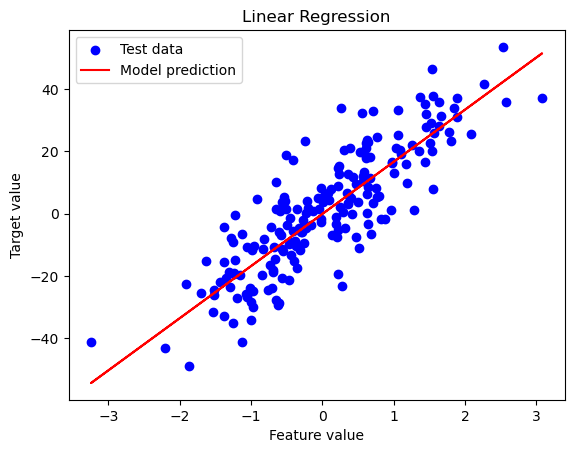

In [49]:
plt.scatter(X_test.ravel(), y_test, color='blue', label='Test data')
plt.plot(X_test.ravel(), y_pred, color='red', label='Model prediction')
plt.title('Linear Regression')
plt.xlabel('Feature value')
plt.ylabel('Target value')
plt.legend()
plt.show()